In [1]:
import torch
print(torch.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2.5.1+cu121


In [2]:
!nvidia-smi

Wed Jan 15 14:37:50 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
#creating a tensor
vector=torch.tensor([[1,2,3],[3,4,5],[5,6,6]])
vector

tensor([[1, 2, 3],
        [3, 4, 5],
        [5, 6, 6]])

In [4]:
vector

tensor([[1, 2, 3],
        [3, 4, 5],
        [5, 6, 6]])

In [5]:
vector.shape

torch.Size([3, 3])

In [6]:
MATRIX=torch.tensor([[7,8],[9,10]])
MATRIX[0]

tensor([7, 8])

TENSORS AND MATRICIES ARE GENERALLY REPRESENTED USING CAPITAL LETTERS

In [7]:
TENSOR=torch.tensor([[[1,2,3],
                      [3,4,5],
                      [5,6,7]],

                      [[1,2,3],
                       [1,2,3],
                       [9,9,9]]])

In [8]:
TENSOR.shape

torch.Size([2, 3, 3])

RANDOM TENSORS

In [9]:
random_tensor=torch.rand(3,3,3,2)

In [10]:
random_tensor

tensor([[[[0.3900, 0.6044],
          [0.1280, 0.6405],
          [0.5824, 0.4448]],

         [[0.2383, 0.7940],
          [0.2518, 0.5322],
          [0.0369, 0.3259]],

         [[0.9040, 0.5197],
          [0.4189, 0.1363],
          [0.0964, 0.5166]]],


        [[[0.8991, 0.9880],
          [0.7067, 0.2063],
          [0.3360, 0.8175]],

         [[0.9311, 0.8732],
          [0.1859, 0.5075],
          [0.9086, 0.9082]],

         [[0.7688, 0.2557],
          [0.1716, 0.8833],
          [0.5313, 0.9460]]],


        [[[0.3136, 0.5417],
          [0.4684, 0.2260],
          [0.5925, 0.4144]],

         [[0.9998, 0.5242],
          [0.5248, 0.3133],
          [0.1412, 0.7072]],

         [[0.7280, 0.8344],
          [0.8122, 0.4859],
          [0.6453, 0.3097]]]])

In [11]:
image_tensor=torch.rand(size=(224,224,3))
image_tensor.shape

torch.Size([224, 224, 3])

ZERO and ONES

In [12]:
zeroes=torch.zeros(size=(1,3,2))

In [13]:
zeroes

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [14]:
one=torch.ones(size=(1,3,2))
one

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [15]:
# creating range of tensors

In [16]:
torch.arange(1,10,7)

tensor([1, 8])

TENSOR DATATYPE

In [17]:
float_32=torch.tensor([3,3,4],dtype=torch.float16,device="cpu")
float_32
print((float_32[0]).dtype)

torch.float16


In [18]:
A=torch.tensor([5],dtype=torch.float64)
B=torch.tensor([7],dtype=torch.float16)
A*B

tensor([35.], dtype=torch.float64)

MANIPULATING TENSORS

In [19]:
# finding the min max and mean of the tensor

In [20]:
x=torch.tensor([10,20,0,100,1000])
torch.min(x)
torch.max(x)

tensor(1000)

In [21]:
torch.mean(x.type(torch.float32))

tensor(226.)

In [22]:
x.argmin()

tensor(2)

In [23]:
x=torch.arange(1.,10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [24]:
x.reshape(3,3)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [25]:
# numpy as tensor

In [26]:
import torch
import numpy as np
array=np.arange(1,8)
tensor=torch.from_numpy(array)
tensor.dtype

torch.int64

In [27]:
array.dtype

dtype('int64')

In [28]:
array=array+1
print(array)
print(tensor)

[2 3 4 5 6 7 8]
tensor([1, 2, 3, 4, 5, 6, 7])


CHECK GPU

In [29]:
torch.cuda.is_available()

True

In [34]:
device="cuda" if torch.cuda.is_available() else "CPU"

In [31]:
tensor=torch.tensor([1,2,3])
print(tensor,tensor.device)

tensor([1, 2, 3]) cpu


In [35]:
tensor_on_gpu=tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

# PYTORCH WORKFLOW

In [36]:
#creating our own linear regression dataset

In [42]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x + bias

In [45]:
x[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [48]:
train_split=int(0.8*len(x))
X_train,y_train=x[:train_split],y[:train_split]
X_test,y_test=x[train_split:],y[train_split:]
len(X_train)

40

In [49]:
import matplotlib.pyplot as plt

In [88]:
import matplotlib.pyplot as plt

def plot_data(train_data=X_train,train_label=y_train, test_data=X_test, test_label=y_test, prediction=None):
    plt.figure(figsize=(10, 7))  # Set figure size
    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

    if prediction is not None:
        plt.scatter(test_data, prediction, c="r", s=4, label="Predictions")

    plt.title("Data Visualization")
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.legend()
    plt.show()

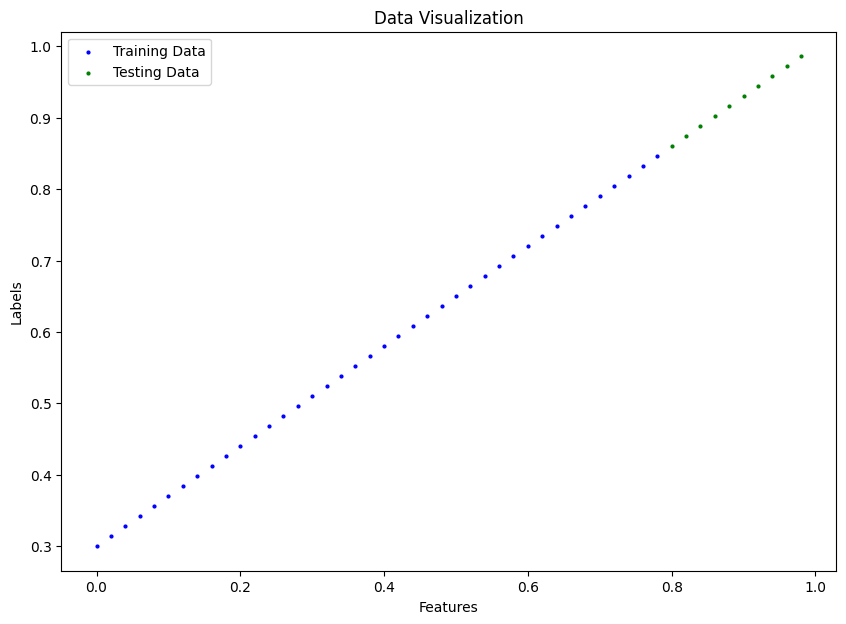

In [89]:
plot_data(X_train,y_train,X_test,y_test)

FIRST PYTORCH MODEL

In [90]:
from torch import nn

In [91]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.rand(1,
                                      requires_grad=True,
                                      dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias #linear Regression Formula


In [92]:
# checking the contents of our pytorch model

torch.manual_seed(42)

model_0=LinearRegression()
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.3904], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])


In [107]:
with torch.inference_mode():
  y_pred=model_0(X_test)

y_pred

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

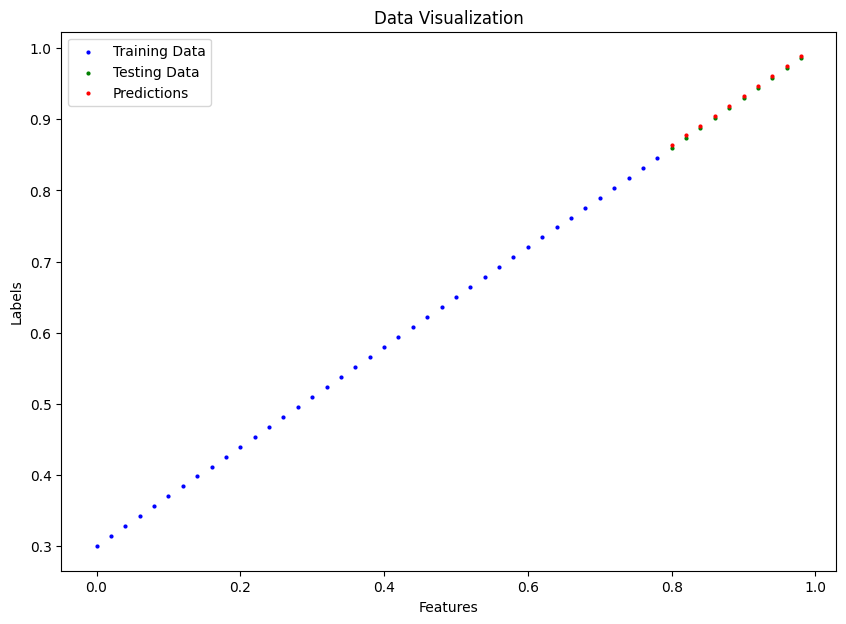

In [108]:
plot_data(prediction=y_pred)

In [101]:
# set up a loss function and set up an optimizer
loss_fun=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [98]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [111]:
# building a traning and testing loop in pytorch
epochs=100
for epoch in range(epochs):
  # train mode in pytorch sets all parameters that require gradients to require gradients
  model_0.train()

  # predict the value
  y_pred=model_0(X_train)

  #calculate the loss
  loss=loss_fun(y_pred,y_train)

  optimizer.zero_grad()

  #perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  optimizer.step()

  #model evaluation
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)

    test_loss=loss_fun(test_pred,y_test)

  if epoch%10==0:
    print(f"EPOCH {epoch}")
    print(f"Train_Loss ={loss}")
    print(f"Test_Loss ={test_loss}")


EPOCH 0
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 10
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 20
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 30
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 40
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 50
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 60
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 70
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 80
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033
EPOCH 90
Train_Loss =0.004964242689311504
Test_Loss =0.010411137714982033


In [116]:
# saving your model in pytorch
""" torch.save() in the python pickle format
    torch.load()
    torch.nn.Module.load_state_dict()
"""

from pathlib import Path
#create a model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#save the model
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)